In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load the sample CSV file
file_path = '/content/drive/MyDrive/Cotton_Data_New/bahawalnagar_2021.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand the data
print(data.head())

# Display general information about the dataframe, including null values
print(data.info())






       district  year  month           area  NDVI_mean  NDVI_min  NDVI_max  \
0  bahawalnagar  2021      5  542568.667345   0.134502  0.000390  0.637092   
1  bahawalnagar  2021      6  542568.667345   0.241808  0.000770  0.625073   
2  bahawalnagar  2021      7  542568.667345   0.271889  0.000258  0.686462   
3  bahawalnagar  2021      8  542568.667345   0.510286  0.169214  0.672224   
4  bahawalnagar  2021      9  542568.667345   0.567518  0.002358  0.801711   

   EVI_mean   EVI_min   EVI_max  ...  NDSI_min  NDSI_max  NDTI_mean  NDTI_min  \
0  0.129982  0.000296  0.765193  ... -0.412668  0.324164   0.170568  0.009241   
1  0.247759  0.000612  0.777345  ... -0.367274  0.245552   0.281394  0.049064   
2  0.300618  0.000242  0.949358  ... -0.402688  0.425743   0.316086  0.049262   
3  0.553337  0.152913  0.859586  ... -0.382016  0.255065   0.541902  0.217037   
4  0.530342  0.001610  0.999250  ... -0.618516  0.548230   0.593151 -0.160457   

   NDTI_max  PSRI_mean  PSRI_min  PSRI_max  

In [ ]:

# Path to your files, adjust it according to your Google Drive structure
path = '/content/drive/MyDrive/Cotton_Data_New'

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through each year and load the corresponding file
for year in range(1999, 2022):  # Adjust the range according to your data
    file_path = f'{path}bahawalnagar_{year}.csv'
    year_data = pd.read_csv(file_path)
    df = pd.concat([df, year_data], ignore_index=True)

# Check the combined data
df

,district,year,month,area,NDVI_mean,NDVI_min,NDVI_max,EVI_mean,EVI_min,EVI_max,...,NDSI_min,NDSI_max,NDTI_mean,NDTI_min,NDTI_max,PSRI_mean,PSRI_min,PSRI_max,avg_muand/acer,yield
0,bahawalnagar,1999,5,597485.674577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.48,542.64
1,bahawalnagar,1999,6,597485.674577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.48,542.64
2,bahawalnagar,1999,7,597485.674577,0.134162,0.091560,0.355324,0.673604,0.417110,0.999973,...,-0.290782,0.171891,-0.099112,-0.330499,0.205178,0.045001,-0.067526,0.127502,16.48,542.64
3,bahawalnagar,1999,8,597485.674577,0.151065,0.091560,0.341099,0.693554,0.417110,0.999976,...,-0.270109,0.162325,-0.105705,-0.338734,0.566558,0.045663,-0.048836,0.109472,16.48,542.64
4,bahawalnagar,1999,9,597485.674577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.48,542.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,bahawalnagar,2021,5,542568.667345,0.134502,0.000390,0.637092,0.129982,0.000296,0.765193,...,-0.412668,0.324164,0.170568,0.009241,0.651018,0.076551,-0.191126,0.204583,19.62,994.03
111,bahawalnagar,2021,6,542568.667345,0.241808,0.000770,0.625073,0.247759,0.000612,0.777345,...,-0.367274,0.245552,0.281394,0.049064,0.642333,0.015385,-0.211492,0.181521,19.62,994.03
112,bahawalnagar,2021,7,542568.667345,0.271889,0.000258,0.686462,0.300618,0.000242,0.949358,...,-0.402688,0.425743,0.316086,0.049262,0.709628,-0.009284,-0.163696,0.141959,19.62,994.03
113,bahawalnagar,2021,8,542568.667345,0.510286,0.169214,0.672224,0.553337,0.152913,0.859586,...,-0.382016,0.255065,0.541902,0.217037,0.694178,-0.073437,-0.184809,0.087587,19.62,994.03


In [ ]:


# List of years and their corresponding missing months you identified
missing_data_info = {
    1999: [5, 6, 9],
    2011: [7],
    2003: [6],
    2002: [6],
    2001: [7, 9],



}

# Function to fill missing data
def fill_missing_months(data, year, months_missing):
    year_data = data[data['year'] == year]
    numeric_cols = year_data.select_dtypes(include=[np.number]).columns.tolist()
    mean_values = year_data[numeric_cols].mean()

    for month in months_missing:
        mask = (year_data['month'] == month) & (year_data['NDVI_mean'].isna())
        if mask.any():
            data.loc[(data['year'] == year) & (data['month'] == month), numeric_cols] = data.loc[(data['year'] == year) & (data['month'] == month), numeric_cols].fillna(mean_values)

# Apply the function to each year with missing months
for year, months in missing_data_info.items():
    fill_missing_months(df, year, months)

# Verify the results
print(df[df['year'].isin(missing_data_info.keys())])


        district  year  month           area  NDVI_mean  NDVI_min  NDVI_max  \
0   bahawalnagar  1999      5  597485.674577   0.142613  0.091560  0.348212   
1   bahawalnagar  1999      6  597485.674577   0.142613  0.091560  0.348212   
2   bahawalnagar  1999      7  597485.674577   0.134162  0.091560  0.355324   
3   bahawalnagar  1999      8  597485.674577   0.151065  0.091560  0.341099   
4   bahawalnagar  1999      9  597485.674577   0.142613  0.091560  0.348212   
10  bahawalnagar  2001      5  399587.447718   0.128100  0.104973  0.228409   
11  bahawalnagar  2001      6  399587.447718   0.135677  0.104977  0.229033   
12  bahawalnagar  2001      7  399587.447718   0.138379  0.104974  0.273477   
13  bahawalnagar  2001      8  399587.447718   0.151361  0.104973  0.362989   
14  bahawalnagar  2001      9  399587.447718   0.138379  0.104974  0.273477   
15  bahawalnagar  2002      5  938179.300700   0.111570  0.080408  0.226963   
16  bahawalnagar  2002      6  938179.300700   0.127

In [ ]:
# # Save the DataFrame to a CSV file
# df.to_csv('/content/drive/MyDrive/final_dataset.csv', index=False)

# print("File has been saved successfully!")


In [ ]:
df

,district,year,month,area,NDVI_mean,NDVI_min,NDVI_max,EVI_mean,EVI_min,EVI_max,...,NDSI_min,NDSI_max,NDTI_mean,NDTI_min,NDTI_max,PSRI_mean,PSRI_min,PSRI_max,avg_muand/acer,yield
0,bahawalnagar,1999,5,597485.674577,0.142613,0.091560,0.348212,0.683579,0.417110,0.999975,...,-0.280446,0.167108,-0.102409,-0.334616,0.385868,0.045332,-0.058181,0.118487,16.48,542.64
1,bahawalnagar,1999,6,597485.674577,0.142613,0.091560,0.348212,0.683579,0.417110,0.999975,...,-0.280446,0.167108,-0.102409,-0.334616,0.385868,0.045332,-0.058181,0.118487,16.48,542.64
2,bahawalnagar,1999,7,597485.674577,0.134162,0.091560,0.355324,0.673604,0.417110,0.999973,...,-0.290782,0.171891,-0.099112,-0.330499,0.205178,0.045001,-0.067526,0.127502,16.48,542.64
3,bahawalnagar,1999,8,597485.674577,0.151065,0.091560,0.341099,0.693554,0.417110,0.999976,...,-0.270109,0.162325,-0.105705,-0.338734,0.566558,0.045663,-0.048836,0.109472,16.48,542.64
4,bahawalnagar,1999,9,597485.674577,0.142613,0.091560,0.348212,0.683579,0.417110,0.999975,...,-0.280446,0.167108,-0.102409,-0.334616,0.385868,0.045332,-0.058181,0.118487,16.48,542.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,bahawalnagar,2021,5,542568.667345,0.134502,0.000390,0.637092,0.129982,0.000296,0.765193,...,-0.412668,0.324164,0.170568,0.009241,0.651018,0.076551,-0.191126,0.204583,19.62,994.03
111,bahawalnagar,2021,6,542568.667345,0.241808,0.000770,0.625073,0.247759,0.000612,0.777345,...,-0.367274,0.245552,0.281394,0.049064,0.642333,0.015385,-0.211492,0.181521,19.62,994.03
112,bahawalnagar,2021,7,542568.667345,0.271889,0.000258,0.686462,0.300618,0.000242,0.949358,...,-0.402688,0.425743,0.316086,0.049262,0.709628,-0.009284,-0.163696,0.141959,19.62,994.03
113,bahawalnagar,2021,8,542568.667345,0.510286,0.169214,0.672224,0.553337,0.152913,0.859586,...,-0.382016,0.255065,0.541902,0.217037,0.694178,-0.073437,-0.184809,0.087587,19.62,994.03


In [ ]:
ground_truth_areas = {
    1999: 450,
    2000: 454,
    2001: 489,
    2002: 541,
    2003: 439,
    2004: 491,
    2005: 524,
    2006: 544,
    2007: 539,
    2008: 556,
    2009: 522,
    2010: 573,
    2011: 559,
    2012: 622,
    2013: 565,
    2014: 564,
    2015: 590,
    2016: 542,
    2017: 509,
    2018: 594,
    2019: 1524,
    2020: 544,
    2021: 608
}


In [ ]:
# Ensure 'year' is an integer if it's not already
df['year'] = df['year'].astype(int)

# Map the ground truth areas to a new column 'area_gt'
df['area_gt'] = df['year'].map(ground_truth_areas)
df['bale'] = 13.68



print(df[['year', 'area_gt']])


     year  area_gt
0    1999      450
1    1999      450
2    1999      450
3    1999      450
4    1999      450
..    ...      ...
110  2021      608
111  2021      608
112  2021      608
113  2021      608
114  2021      608

[115 rows x 2 columns]


In [ ]:

# Load the dataset
#data = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')

# Selecting spectral index columns (mean, min, max) and the target column 'yield'

df = df.groupby(['district', 'year']).mean().reset_index()
print(df.head())

index_features = [col for col in df.columns if any(metric in col for metric in ['mean', 'min', 'max', 'gt', 'acer', 'bale'])]
features = df[index_features]
target = df['yield']

print("Selected Features for Modeling:")
print(features.head())

target.head()

       district  year  month           area  NDVI_mean  NDVI_min  NDVI_max  \
0  bahawalnagar  1999    7.0  597485.674577   0.142613  0.091560  0.348212   
1  bahawalnagar  2000    7.0  490268.933121   0.125897  0.084124  0.272897   
2  bahawalnagar  2001    7.0  399587.447718   0.138379  0.104974  0.273477   
3  bahawalnagar  2002    7.0  938179.300700   0.127172  0.080475  0.259296   
4  bahawalnagar  2003    7.0  324408.711335   0.126653  0.080416  0.248913   

   EVI_mean   EVI_min   EVI_max  ...  NDTI_mean  NDTI_min  NDTI_max  \
0  0.683579  0.417110  0.999975  ...  -0.102409 -0.334616  0.385868   
1  0.635114  0.384567  0.999967  ...  -0.090177 -0.291654  0.225965   
2  0.690650  0.446432  0.999971  ...  -0.099331 -0.293359  0.244059   
3  0.612070  0.376628  0.999972  ...  -0.090166 -0.262846  0.250560   
4  0.633704  0.361813  0.999972  ...  -0.075464 -0.314175  0.376934   

   PSRI_mean  PSRI_min  PSRI_max  avg_muand/acer   yield  area_gt   bale  
0   0.045332 -0.058181  0.118

0    542.64
1    710.69
2    578.07
3    595.80
4    544.45
Name: yield, dtype: float64

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# features = scaler.fit_transform(features)
# features

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=True)
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (18, 45)
Testing Set Size: (5, 45)


In [ ]:


# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)


# Predict on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE on Testing Set:", rmse)


RMSE on Testing Set: 101.10193046218934


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# Initialize models
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
svr_regressor = SVR(kernel='rbf')

# List of models
models = [
    ("Decision Tree Regressor", dt_regressor),
    ("Random Forest Regressor", rf_regressor),
    ("Gradient Boosting Regressor", gb_regressor),
    ("Support Vector Regression", svr_regressor)
]

# Train and evaluate models
results = []
for name, model in models:
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append((name, rmse, mae))

# Display results
for result in results:
    print(f"{result[0]} - RMSE: {result[1]} - MAE: {result[2]}")


Decision Tree Regressor - RMSE: 211.328787769201 - MAE: 144.54199999999997
Random Forest Regressor - RMSE: 103.30587749059588 - MAE: 85.34950000000018
Gradient Boosting Regressor - RMSE: 102.08557029162338 - MAE: 72.85732424574925
Support Vector Regression - RMSE: 182.47450431512925 - MAE: 142.45192151609973


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
param_grid_dt = {
    'max_depth': [None, 50, 70, 100],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3]
}

param_grid_rf = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 50, 70],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

param_grid_svr = {
    'C': [50, 100, 150],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

# Models setup
models = {
    # "Decision Tree": (DecisionTreeRegressor(random_state=42), param_grid_dt),
     "Random Forest": (RandomForestRegressor(random_state=42), param_grid_rf),
    # "Gradient Boosting": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    # "SVR": (SVR(), param_grid_svr)
}

# Run grid search and evaluate each model
results = {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = (grid_search.best_params_, mae, rmse, r2)

# Print results for each model
for model_name, (best_params, mae, rmse, r2) in results.items():
    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
MAE: 88.32678502857149, RMSE: 115.53666388527625, R²: 0.5971912182671324



In [ ]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,         # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # To display messages when the callback takes an action
                               mode='min',          # The training will stop when the quantity monitored has stopped decreasing
                               restore_best_weights=True)

In [ ]:
huber_loss = Huber(delta=1.0)  # Delta can be tuned
model.compile(optimizer=Adam(learning_rate=0.001), loss=huber_loss, metrics=['mean_absolute_error'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 185.5244 - mean_absolute_error: 186.0244 - val_loss: 635.6930 - val_mean_absolute_error: 636.1930
Epoch 2/1000
1/1 [==============================] - 0s 35ms/step - loss: 625.6497 - mean_absolute_error: 626.1497 - val_loss: 284.7311 - val_mean_absolute_error: 285.2311
Epoch 3/1000
1/1 [==============================] - 0s 33ms/step - loss: 306.0004 - mean_absolute_error: 306.5004 - val_loss: 185.6104 - val_mean_absolute_error: 186.1104
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 308.2845 - mean_absolute_error: 308.7845 - val_loss: 329.6668 - val_mean_absolute_error: 330.1668
Epoch 5/1000
1/1 [==============================] - 0s 31ms/step - loss: 432.9485 - mean_absolute_error: 433.4485 - val_loss: 272.7073 - val_mean_absolute_error: 273.2073
Epoch 6/1000
1/1 [==============================] - 0s 33ms/step - loss: 375.0459 - mean_absolute_error: 375.5459 - val_loss: 94.8317 - val_mean_ab

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


1/1 [==============================] - 0s 23ms/step - loss: 38.2025 - mean_absolute_error: 38.7025
Test Loss: 38.202491760253906, Test MAE: 38.702491760253906


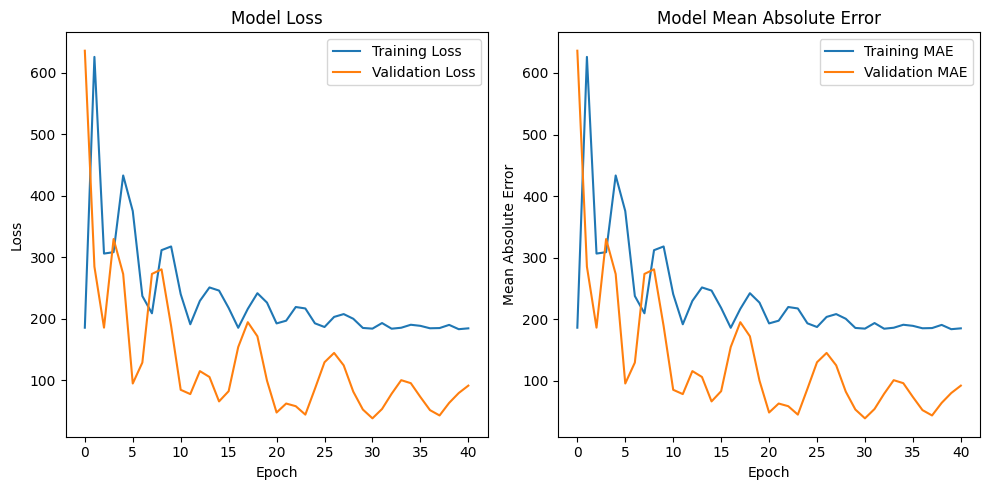

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the model.fit() function
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Mean Absolute Error
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjusts plot parameters to give specified padding
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/ann_model.h5')  # Saves as an HDF5 file


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/ann_model_default')  # Saves as a TensorFlow SavedModel (default)
